
Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [34]:
import warnings

warnings.filterwarnings('ignore')

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [36]:
boston = load_boston()
data = boston['data']
target = boston['target']
feature_names = boston['feature_names']
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [37]:
x = pd.DataFrame(data, columns=feature_names)

y = pd.DataFrame(target, columns=["price"])

In [38]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [64]:
lr.fit(x_train, y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(X_test)

y_pred.shape

(152, 1)

In [66]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,20.941524
274,32.4,35.859809
491,13.6,25.219240
72,22.8,7.590546
452,16.1,9.382546
76,20.0,25.226024
316,17.8,37.331694
140,14.0,23.126140
471,19.6,24.171668
500,16.8,10.940558


In [67]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test.head()

,y_test,y_pred,error
173,23.6,20.941524,-2.658476
274,32.4,35.859809,3.459809
491,13.6,25.219240,11.619240
72,22.8,7.590546,-15.209454
452,16.1,9.382546,-6.717454


In [68]:
mse1 = (check_test["error"] ** 2).mean()

mse1

122.10527337609722

In [69]:
(np.abs(check_test["error"])).mean()

8.789464188408871

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [71]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

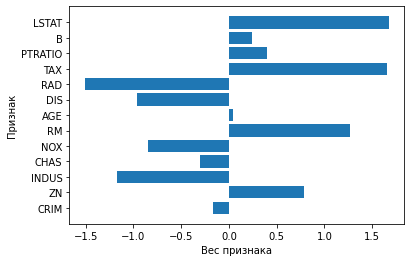

In [72]:
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [73]:
important_features = [
    feature
    for feature, weight in zip(feature_names, lr.coef_.flatten())
    if np.abs(weight) > 0.5
]

print(important_features)

['ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT']


In [74]:
lr.fit(
    X_train_scaled.loc[:, important_features],
    y_train
)

y_pred = lr.predict(X_test_scaled.loc[:, important_features])

mse2 = mean_squared_error(y_test, y_pred)

print("mse до: {}".format(mse1))
print("mse после: {}".format(mse2))

mse до: 122.10527337609722
mse после: 83.1928955969418


In [80]:
from sklearn.metrics import r2_score

In [86]:
R2 = r2_score(y_pred, y_test)
R2

-28.09455173969682